# 1) Extract reviews of any product from ecommerce website like amazon
## 2) Perform emotion mining


In [13]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [14]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
iphone_review=[]

In [16]:
url="https://www.amazon.in/New-Apple-iPhone-11-64GB/product-reviews/B08L8DV7BX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"


In [17]:
response=requests.get(url)

In [18]:
response.status_code

200

In [19]:
soup = bs(response.content,"html.parser")


In [21]:
for i in soup.findAll("span",{"data-hook":"review-body"}):
  iphone_review.append(i.text)

In [23]:
len(iphone_review)

10

In [24]:
iphone_review = list(set(iphone_review))

In [25]:
iphone_review

["\n\n  Please do not buy expensive product like iphone from Amazon, i had very bad exp, the charger cord was missing and had sound quality issues. Amazon initial told charger doesn't come in box and when i challenged it they asked reimburse the cord amount, but i requested a replacement, after some days they called me and informed that they dont take responsibility of missing items, and 10 day replacement policy they dont follow, you can read the email conversation attached  here where i mentioned every thing, i have the call recordings as well. At last they denied the phone replacement and even to provide the missing cord. For any damage or quality issues they said amazon is not responsible.\n\n",
 '\n\n  My Phone is Producing Too Much Heat Even Didn’t Put Sim , Never used more than Half an hour And It’s producing too much heat.. Totally Disappointed With Amazon. Now they are saying To Go Icare services( After Calling to customer care several times) Amazon can’t do anything For this 

In [26]:
txt_upd = ' '.join(iphone_review)

In [27]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [28]:
txt_upd

' please do not buy expensive product like iphone from amazon i had very bad exp the charger cord was missing and had sound quality issues amazon initial told charger doesn t come in box and when i challenged it they asked reimburse the cord amount but i requested a replacement after some days they called me and informed that they dont take responsibility of missing items and day replacement policy they dont follow you can read the email conversation attached here where i mentioned every thing i have the call recordings as well at last they denied the phone replacement and even to provide the missing cord for any damage or quality issues they said amazon is not responsible my phone is producing too much heat even didn t put sim never used more than half an hour and it s producing too much heat totally disappointed with amazon now they are saying to go icare services after calling to customer care several times amazon can t do anything for this worst experience with amazon no one would 

In [29]:
text_tokens = word_tokenize(txt_upd)

In [30]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [31]:
tf = TfidfVectorizer()

In [32]:
text_tf = tf.fit_transform(tokens_without_sw)

In [33]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [34]:
df.head()

,accessories,air,already,amazon,amount,angles,anything,appario,apple,asap,asked,attached,awesome,back,bad,beautiful,becuase,better,bought,box,browsing,buy,call,called,calling,camera,cant,card,center,centre,challenged,charge,charger,comes,complaints,conditions,confirmed,connector,cons,conversation,...,shop,sim,since,slowly,software,sound,stage,started,starting,store,strain,struggling,suudenly,switched,terms,th,thing,thought,thread,time,times,today,told,totally,tried,unlocking,upgrade,use,used,using,variant,well,wet,wide,within,working,worst,would,yes,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
word_list = ' '.join(df)

In [36]:
word_list

'accessories air already amazon amount angles anything appario apple asap asked attached awesome back bad beautiful becuase better bought box browsing buy call called calling camera cant card center centre challenged charge charger comes complaints conditions confirmed connector cons conversation cord correct cost customer damage damaged date day days deals defective delivered delivery denied design disappointed discount dont dubious earpods ears edit email especially even ever every excessive exchanged exp expensive experience fast fastvery feel feeling find first flipkart follow furious game gb get getting go going good google got grabbed great guys half hand hassle hdfc heat heating helloplease help hidden hold hour icare id image imagine impression informed initial instant instead iphone issue issues items job km last later light lighting like little located look loss lot love lovin ltd macbook many mentioned might minutes missing mobile mode modes mono month morning much nearest n

In [37]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)


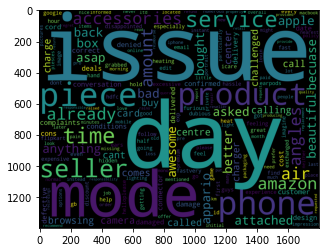

In [38]:
plt.imshow(wordcloud)
plt.show()

In [40]:
with open("/content/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [43]:
 positive_words = positive_words[35:]

In [44]:
with open("/content/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [45]:
negative_words = negative_words[35:]

In [46]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [47]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

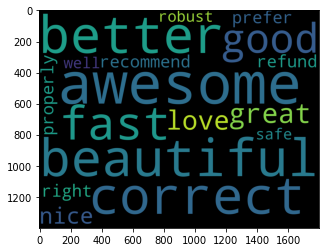

In [52]:
plt.imshow(wordcloud_pos)
plt.show()

In [49]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

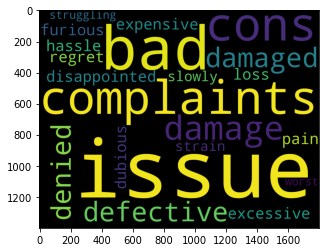

In [51]:
plt.imshow(wordcloud_neg)
plt.show()